# <b>1 <span style='color:#FFB875'>|</span> Introduction</b>
![](https://i.pinimg.com/originals/3b/f6/08/3bf608b1f755d2ef1307ad913a9b58d5.jpg)

### What to Expect?
In this notebook, I will explore the [Spanish Wine Quality Dataset](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset) and fit a regression model on the price column. I will use Scikit-Learn, Pandas, Numpy, Seaborn and Matplotlib.pyplot in this notebook

### Dataset Description
#### Context
This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). The task is to predict either the quality of wine or the prices using the given data.

#### Content
The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description. 

#### Attribute Information
* **winery**: Winery name
* **wine**: Name of the wine
* **year**: Year in which the grapes were harvested
* **rating**: Average rating given to the wine by the users *[from 1-5]*
* **num_reviews**: Number of users that reviewed the wine
* **country**: Country of origin *[Spain]*
* **region**: Region of the wine
* **price**: Price in euros *[€]*
* **type**: Wine variety
* **body**: Body score, defined as the richness and weight of the wine in your mouth *[from 1-5]*
* **acidity**: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip *[from 1-5]*

# <b>2 <span style='color:#FFB875'>|</span> Preparing the Data</b>

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../input/spanish-wine-quality-dataset/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


#### First lets clean our data and do data validation

In [3]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

There are some null values on our dataset so lets drop them

In [4]:
df = df.dropna()

In [5]:
df.shape

(6329, 11)

Lets now see some simple statistical information of our numerical columns and lets also see the datasets info

In [6]:
df.describe()

,rating,num_reviews,price,body,acidity
count,6329.000000,6329.000000,6329.000000,6329.000000,6329.000000
mean,4.259425,442.292463,65.659082,4.158319,2.946753
std,0.124306,718.597235,162.599997,0.583345,0.247955
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,388.000000,19.980000,4.000000,3.000000
50%,4.200000,402.000000,29.150000,4.000000,3.000000
75%,4.200000,415.000000,60.950000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6329 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6329 non-null   object 
 1   wine         6329 non-null   object 
 2   year         6329 non-null   object 
 3   rating       6329 non-null   float64
 4   num_reviews  6329 non-null   int64  
 5   country      6329 non-null   object 
 6   region       6329 non-null   object 
 7   price        6329 non-null   float64
 8   type         6329 non-null   object 
 9   body         6329 non-null   float64
 10  acidity      6329 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 593.3+ KB


I have also noticed that there is a string value that was stopping me to convert the year column into numerical datatype, and it was N.V. value. So I'm not sure what it meant so lets just drop them also since there not alot of 'N.V.' in the column anyways.

In [8]:
df['year'] = df['year'].replace('N.V.', np.NaN)
df = df.dropna()
df['year'] = df['year'].astype(np.int64)

Additionally, the column country only has one value so it would not be helpful at all for our model so lets remove the country column.

In [9]:
df = df.drop(columns=['country'])
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


I think we are now ready for our next step

# <b>3 <span style='color:#FFB875'>|</span> Exploratory Data Anaysis</b>

<AxesSubplot:>

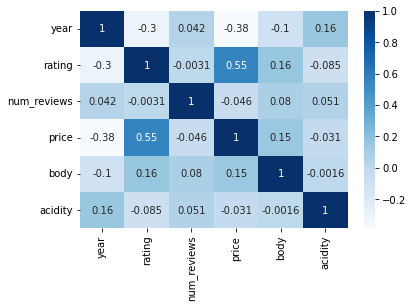

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Oooh seems like most of our numerical variables does not have much of a correlation on the price column except for the rating that has a weak to moderate positive correlation. The price and rating column has a positive correlation which means that when the rating is high, its more likely that the price is also high, which make sense (but not in all cases).

#### Does the type of the wine affects the wines price?

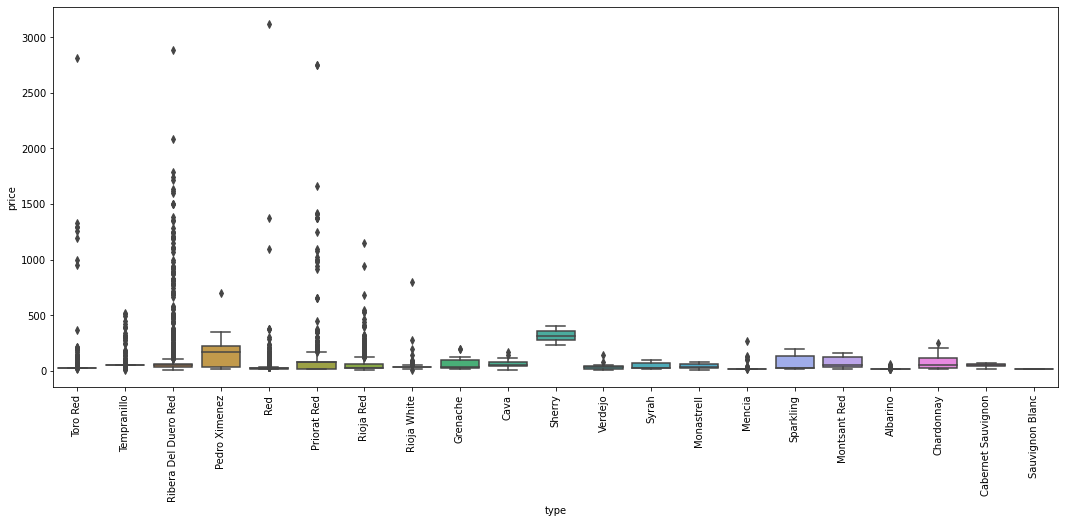

In [11]:
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='type', data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()

The boxplots are very close to each other so its quite hard to make a inference, but based on the boxplot above, the type of wine as a little to no relationship on the wines prices

# <b>4 <span style='color:#FFB875'>|</span> Preprocessing the Data</b>
#### Label Encoding Categorical Columns

In [12]:
print('Categorical columns: ')
for col in df.columns:
    if df[col].dtype == 'object':
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str))

Categorical columns: 
winery
wine
region
type


#### Standarization

In [13]:
df = (df-df.mean())/df.std()
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,1.281015,1.291723,0.006271,5.114070,-0.631438,1.143410,5.604341,2.208328,1.407862,0.217730
1,-1.766666,1.546400,0.706038,5.114070,-0.676061,1.355532,1.486888,1.932690,-0.275693,-3.899472
2,1.493195,1.374770,-0.553542,4.314853,2.235989,0.294921,1.556066,0.003224,1.407862,0.217730
3,1.493195,1.374770,-1.953074,4.314853,2.090552,0.294921,3.779491,0.003224,1.407862,0.217730
4,1.493195,1.374770,-2.372934,4.314853,1.436084,0.294921,4.293644,0.003224,1.407862,0.217730


#### Splitting the data using train test split

In [14]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# <b>5 <span style='color:#FFB875'>|</span> Training</b>
#### Lets import models for regression

In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Lets make a function that will train every regression model and choose which has the highest r2 score

In [16]:
models = {}
def train_validate_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    models[index] = r2

In [17]:
model_list = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
              RandomForestRegressor]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Linear SVR', 
               'KNeighbors Regressor', 'Random Forest Regressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [18]:
models

{'Linear Regression': 0.40213034034400175,
 'Lasso': -0.00041728602891510924,
 'Ridge': 0.4021198286095262,
 'Bayesian Ridge': 0.4019198496602987,
 'Decision Tree Regressor': -0.0005850158553866169,
 'Linear SVR': 0.1972481957673048,
 'KNeighbors Regressor': 0.6622171034392672,
 'Random Forest Regressor': 0.7626325735849003}

Here we can see that KNeighbors Regressor had the highest r2 score (0.6622171034392672), so lets use that model!

# <b>6 <span style='color:#FFB875'>|</span> Evaluating</b>

In [19]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)
preds = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

#### Now lets visualize our models predictions

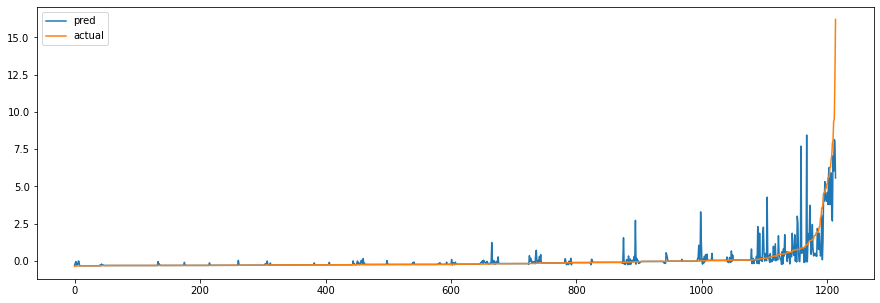

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()

Oh look! The model does it job but not particularly good nor bad. But personally its kinda predictable that our model would do bad as how we saw that most columns has a very little to no relationship toward to the wines prices.

Surprisingly though, our model did alright at predicting low prices wines but did terrible at high prices wines, I think what caused this from happening according to our EDA earlier, that in our dataset, theres way more data on low prices wines but theres a little data from the high price wines.

# <b>7 <span style='color:#FFB875'>|</span> Authors Message</b> 
* If you find this helpful, I would really appreciate the upvote!
* If you see something wrong please let me know.
* And lastly Im happy to hear your thoughts about the notebook for me to also improve!